<a href="https://colab.research.google.com/github/jovanadobreva/Labs-I2DS/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font  color='Orange'>Data Preparation & KNN Classification</font>


In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <font color = 'Orange'> Read your Dataset (.csv)</font>
run the code below for downloading the dataset

In [2]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
from VNP.packages.missing_values import *
from VNP.packages.visualization import *


# <font color = 'Orange'> Data preprocessing </font>

Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Input columns: Pregnancies, Glucose, BloodPressure,SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

Output columns: Outcome 0-->doesn't have diabetes / 1--> has diabetes

## <font color = 'Orange'>Detect the Missing values</font>

In [65]:
from VNP.packages.data_alalysis import *

In [7]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Pregnancies,14,1.822917,768
1,Glucose,0,0.000000,768
2,BloodPressure,0,0.000000,768
3,SkinThickness,8,1.041667,768
4,Insulin,0,0.000000,768
5,BMI,10,1.302083,768
6,DiabetesPedigreeFunction,0,0.000000,768
7,Age,0,0.000000,768
8,Outcome,0,0.000000,768


In [62]:
balance_table  = df.groupby("Outcome").size().reset_index().rename(columns={"Outcome": "Class", 0: "Count"})

In [63]:
balance_table

,Class,Count
0,0,500
1,1,268


In [64]:
tmp = (balance_table["Count"] / len(df)).reset_index().rename(columns={"Outcome":"Class", "Count":"Percentage"})
balance_table["Percentage"] = tmp["Percentage"]
balance_table

,Class,Count,Percentage
0,0,500,0.651042
1,1,268,0.348958


In [66]:
balance_table(df, "Outcome")

,Class,Count,Percentage
0,0,500,0.651042
1,1,268,0.348958


Count the percentage of missing values in every column of the Dataset.

In [8]:
#add your code

## <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

Visualize the missing values using Missingno library

<Axes: >

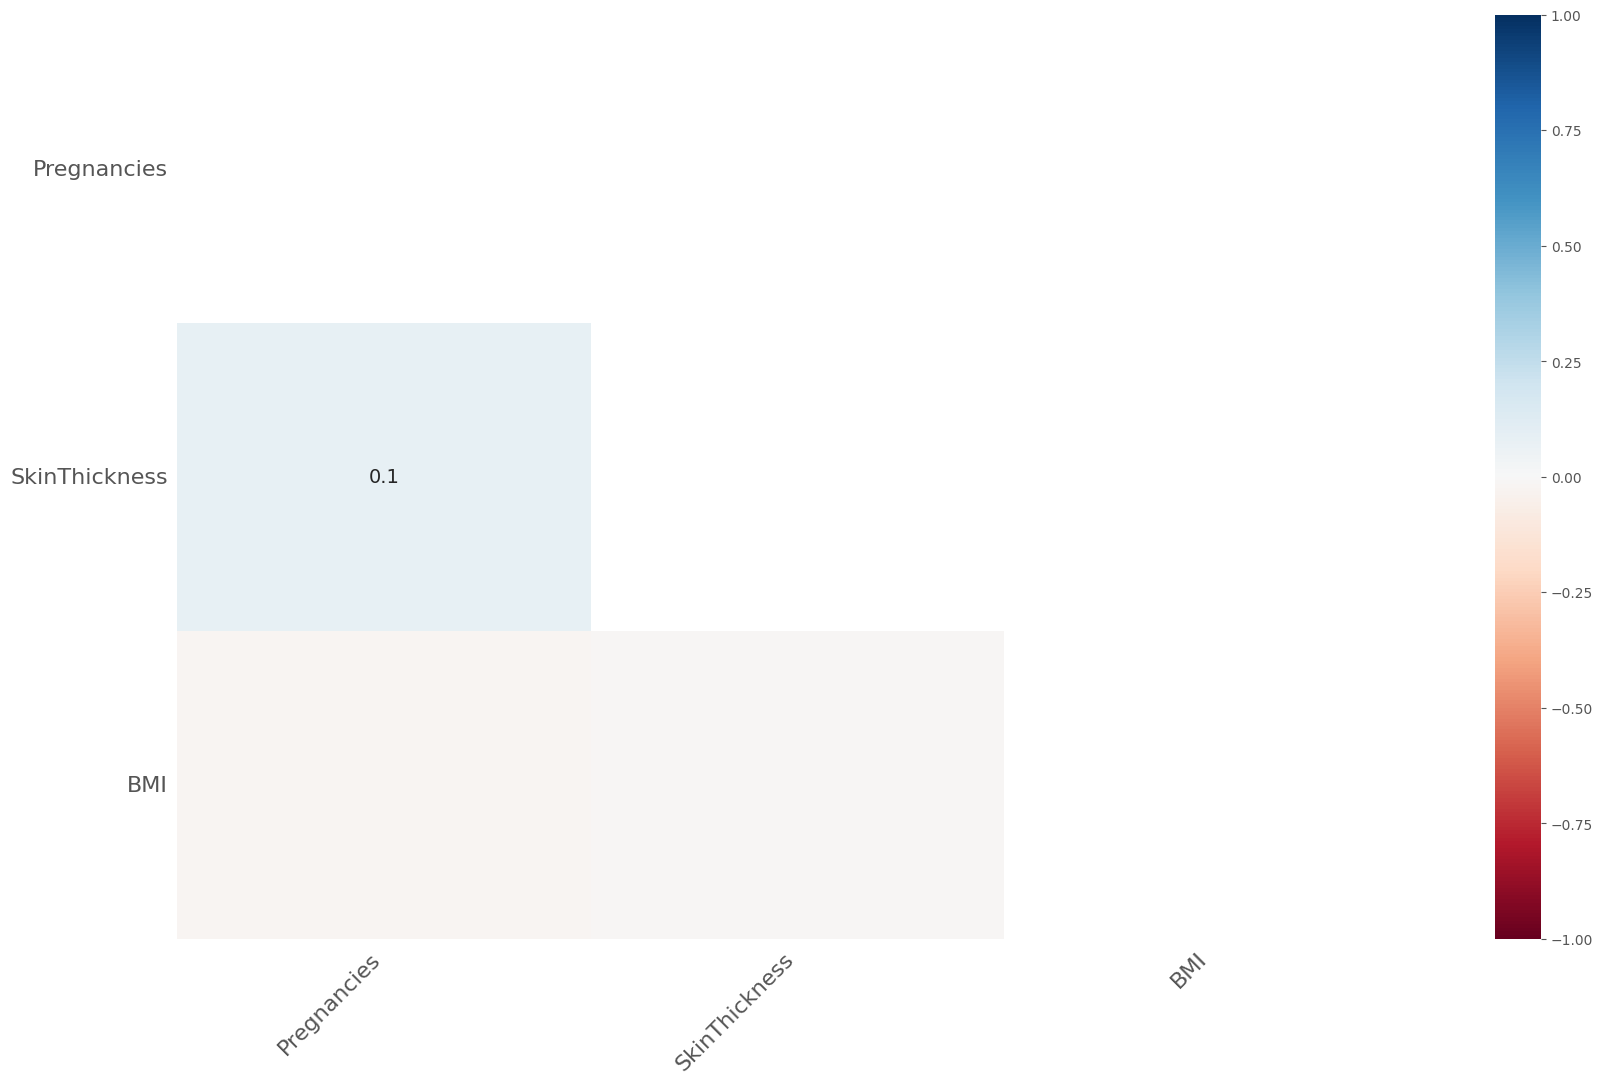

In [9]:
#add your code
msno.heatmap(df, labels=True)

<Axes: >

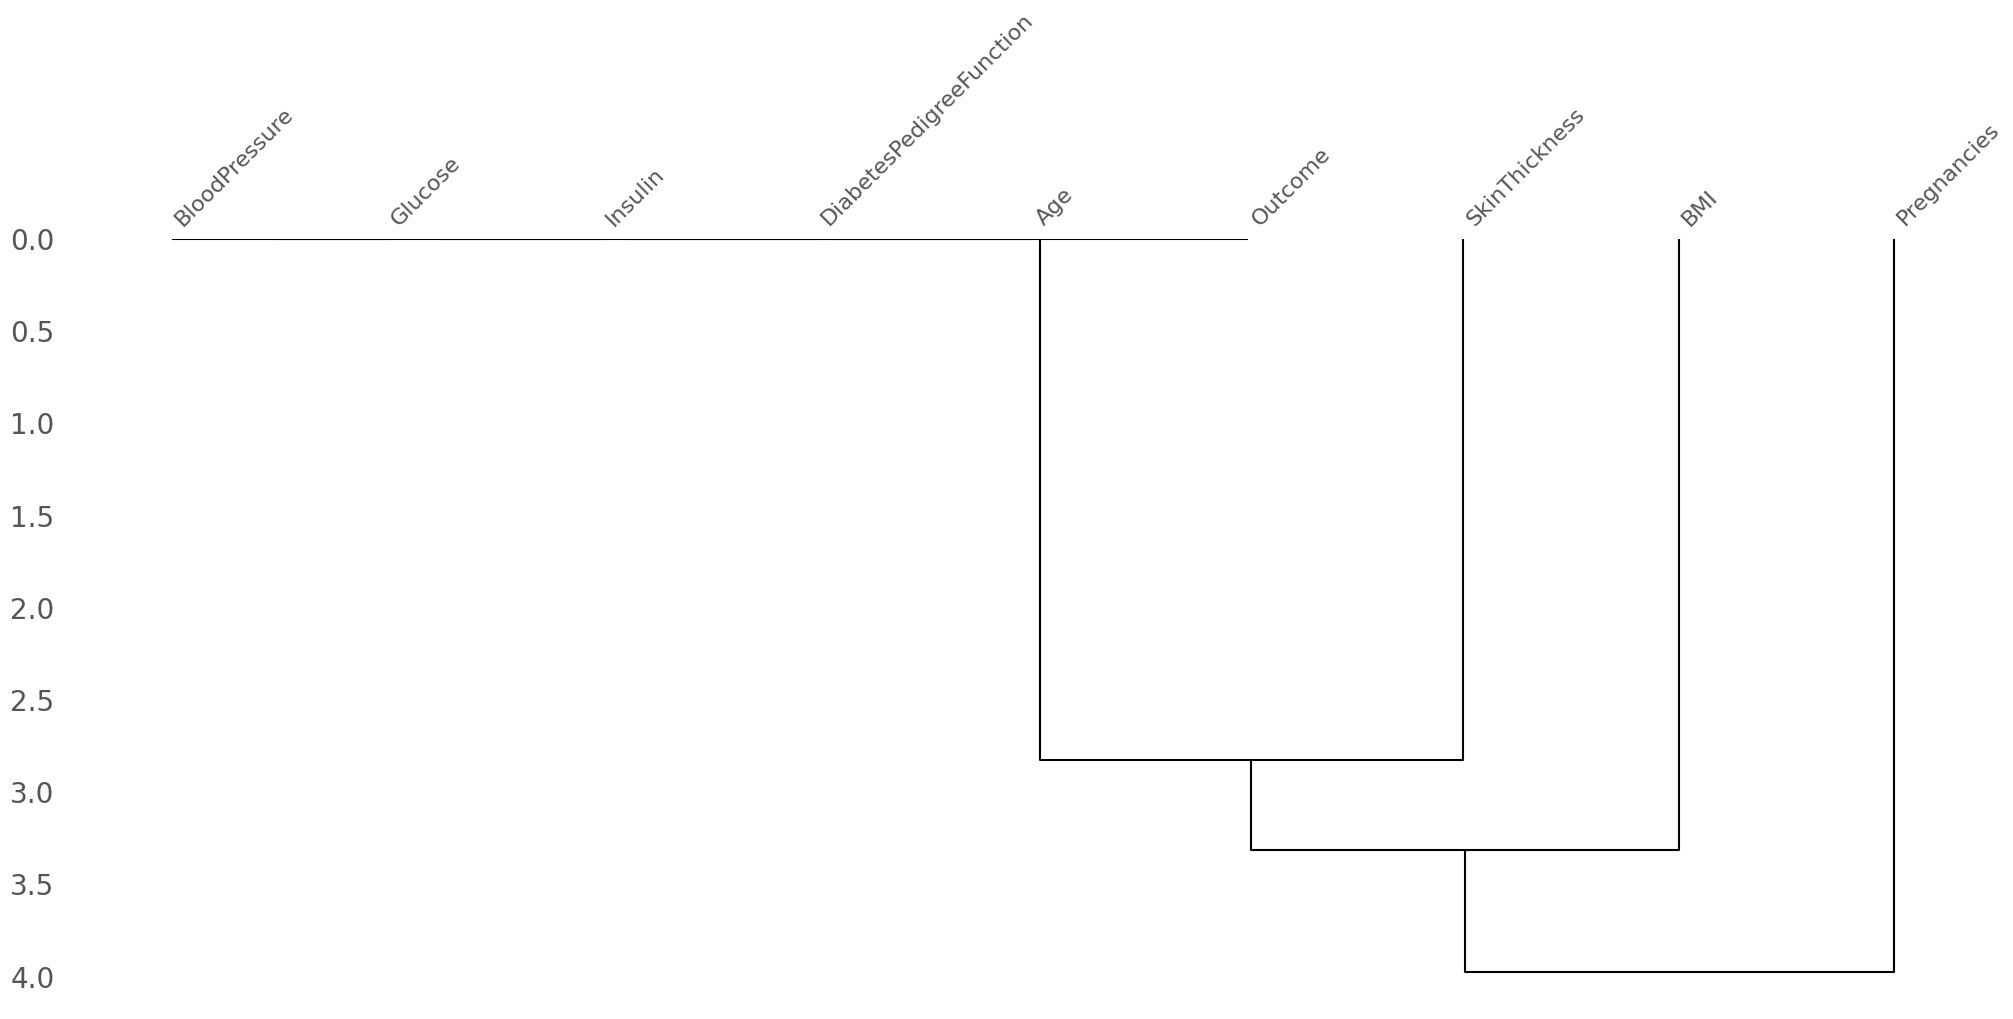

In [10]:
msno.dendrogram(df)

## <font color = 'Orange'>Handle the missing values</font>

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

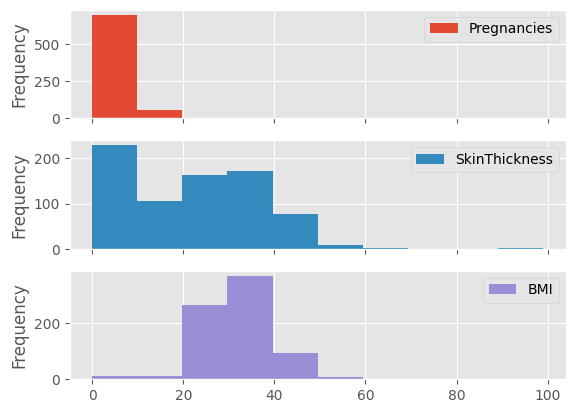

In [11]:
#add your code
df[["Pregnancies", "SkinThickness", "BMI"]].plot.hist(subplots=True)

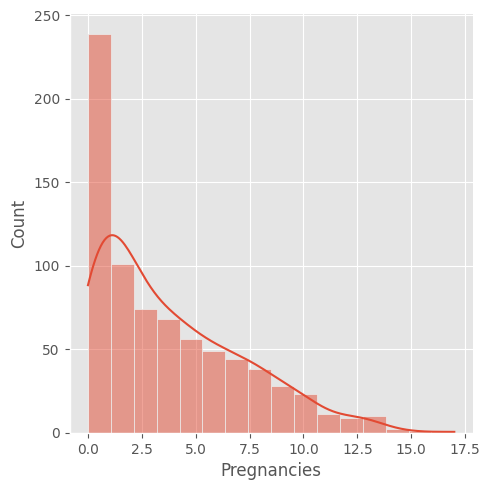

In [12]:
sns.displot(df, x="Pregnancies", kde=True)

In [13]:
from VNP.packages.data_alalysis import *

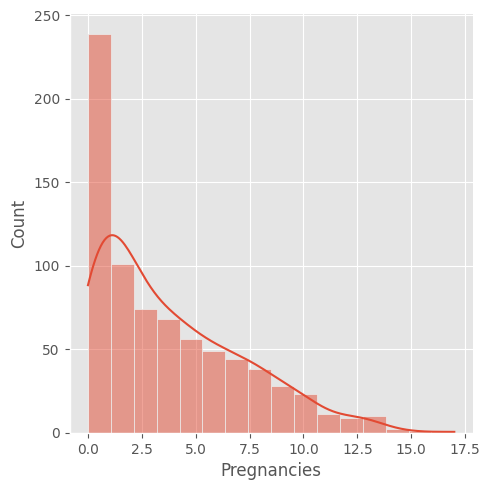

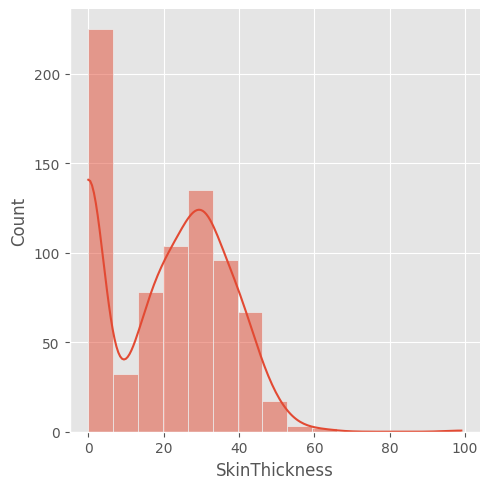

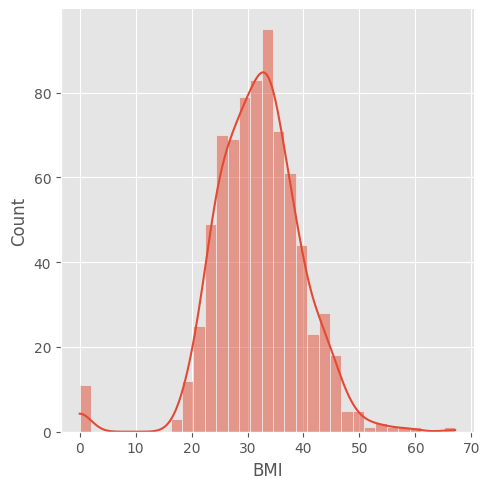

In [14]:
show_displots(df, columns=["Pregnancies", "SkinThickness", "BMI"])

In [15]:
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

In [16]:
iterative_imputer = IterativeImputer()
imputet_values = iterative_imputer.fit_transform(df[["Pregnancies", "SkinThickness"]])
df[["Pregnancies", "SkinThickness"]] = imputet_values

In [17]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Pregnancies,0,0.0,768
1,Glucose,0,0.0,768
2,BloodPressure,0,0.0,768
3,SkinThickness,0,0.0,768
4,Insulin,0,0.0,768
5,BMI,0,0.0,768
6,DiabetesPedigreeFunction,0,0.0,768
7,Age,0,0.0,768
8,Outcome,0,0.0,768


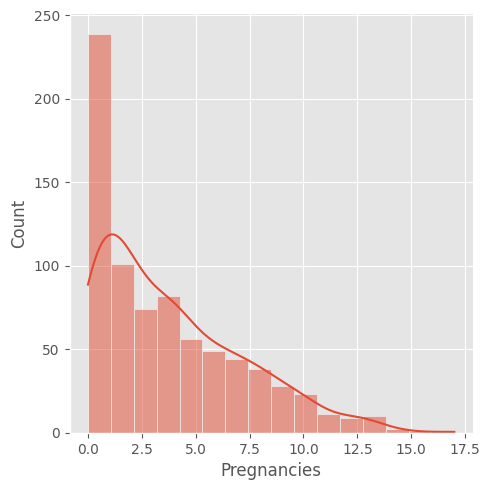

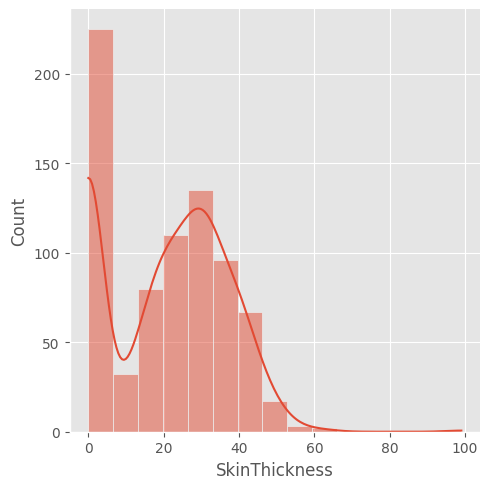

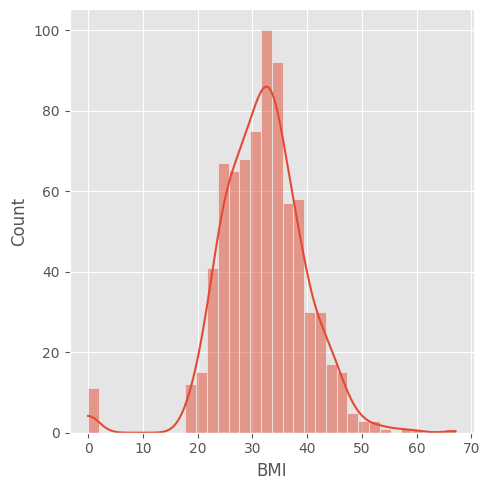

In [18]:
show_displots(df, columns=["Pregnancies", "SkinThickness", "BMI"])


## <font color = 'Orange'>Save the new Dataset(.csv) without the missing values</font>

In [19]:
#add your code
df.to_csv("./data/diabetes-no-missing.csv")

Print the first rows of your final Dataset

In [20]:
#add your code
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.865031,120.894531,69.105469,20.533000,79.799479,31.962533,0.471876,33.240885,0.348958
std,3.342796,31.972618,19.355807,15.888411,115.244002,7.843367,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# <font color='orange'>KNN Classification</font>

##<font color = 'Orange'>Split the dataset for training and testing in ratio 80:20 </font>


In [22]:
#add your code
from VNP.packages.data_preperation import *

In [23]:
Y = df["Outcome"]
X = df.drop(columns="Outcome", axis= 1)

In [24]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35.0,0,33.6,0.627,50
1,1.0,85,66,29.0,0,26.6,0.351,31
2,8.0,183,64,0.0,0,23.3,0.672,32
3,1.0,89,66,23.0,94,28.1,0.167,21
4,0.0,137,40,35.0,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.9,0.171,63
764,2.0,122,70,27.0,0,36.8,0.340,27
765,5.0,121,72,23.0,112,26.2,0.245,30
766,1.0,126,60,0.0,0,30.1,0.349,47


In [26]:
train_x, test_x, train_y, test_y = train_test_split(X,Y,random_state=0, shuffle=True, test_size=0.2)

In [27]:
train_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7.0,150,78,29.0,126,35.200000,0.692,54
118,4.0,97,60,23.0,0,28.200000,0.443,22
247,0.0,165,90,33.0,680,31.962533,0.427,23
157,1.0,109,56,21.0,135,25.200000,0.833,23
468,8.0,120,0,0.0,0,30.000000,0.183,38
...,...,...,...,...,...,...,...,...
763,10.0,101,76,48.0,180,32.900000,0.171,63
192,7.0,159,66,0.0,0,30.400000,0.383,36
629,4.0,94,65,22.0,0,24.700000,0.148,21
559,11.0,85,74,0.0,0,30.100000,0.300,35


In [28]:
test_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199,76,43.0,0,42.9,1.394,22
122,2.0,107,74,30.0,100,33.6,0.404,23
113,4.0,76,62,0.0,0,34.0,0.391,25
14,5.0,166,72,19.0,175,25.8,0.587,51
529,0.0,111,65,0.0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2.0,105,80,45.0,191,33.7,0.711,29
482,4.0,85,58,22.0,49,27.8,0.306,28
230,4.0,142,86,0.0,0,44.0,0.645,22
527,3.0,116,74,15.0,105,26.3,0.107,24


In [29]:
train_y

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [30]:
test_y

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

## <font color = 'Orange'>Initialize the KNN Classification model, and use the fit function for training the model</font>

In [31]:
#add your code
from VNP.packages.models import *

knn_model = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

In [32]:
normalizator = MinMaxScaler()
normalised_values = normalizator.fit_transform(train_x)
train_x_norm = pd.DataFrame(normalised_values, columns=train_x.columns)
train_x_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.411765,0.757576,0.639344,0.292929,0.148936,0.524590,0.262169,0.550000
1,0.235294,0.489899,0.491803,0.232323,0.000000,0.420268,0.155850,0.016667
2,0.000000,0.833333,0.737705,0.333333,0.803783,0.476342,0.149018,0.033333
3,0.058824,0.550505,0.459016,0.212121,0.159574,0.375559,0.322374,0.033333
4,0.470588,0.606061,0.000000,0.000000,0.000000,0.447094,0.044833,0.283333
...,...,...,...,...,...,...,...,...
609,0.588235,0.510101,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
610,0.411765,0.803030,0.540984,0.000000,0.000000,0.453055,0.130231,0.250000
611,0.235294,0.474747,0.532787,0.222222,0.000000,0.368107,0.029889,0.000000
612,0.647059,0.429293,0.606557,0.000000,0.000000,0.448584,0.094791,0.233333


In [33]:
test_x_norm = pd.DataFrame(normalizator.transform(test_x), columns=test_x.columns)
test_x_norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,1.005051,0.622951,0.434343,0.000000,0.639344,0.561913,0.016667
1,0.117647,0.540404,0.606557,0.303030,0.118203,0.500745,0.139197,0.033333
2,0.235294,0.383838,0.508197,0.000000,0.000000,0.506706,0.133646,0.066667
3,0.294118,0.838384,0.590164,0.191919,0.206856,0.384501,0.217336,0.500000
4,0.000000,0.560606,0.532787,0.000000,0.000000,0.366617,0.248506,0.166667
...,...,...,...,...,...,...,...,...
149,0.117647,0.530303,0.655738,0.454545,0.225768,0.502235,0.270282,0.133333
150,0.235294,0.429293,0.475410,0.222222,0.057920,0.414307,0.097353,0.116667
151,0.235294,0.717172,0.704918,0.000000,0.000000,0.655738,0.242101,0.016667
152,0.176471,0.585859,0.606557,0.151515,0.124113,0.391952,0.012383,0.050000


In [34]:
knn_model.fit(train_x, train_y)

KNeighborsClassifier()

## <font color = 'Orange'>Predict the outcomes for X test</font>

In [35]:
#add your code
predict = knn_model.predict(test_x)

## <font color = 'Orange'>See the model performance, by using sklearn metrics for classification</font>



In [39]:
#add your code
from VNP.packages.evaluation import *

In [37]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.60      0.62      0.61        47

    accuracy                           0.76       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.76      0.76      0.76       154



In [38]:
confusion_matrix(test_y, predict)

array([[88, 19],
       [18, 29]])

In [40]:
precision_score(test_y, predict)

np.float64(0.6041666666666666)

In [41]:
recall_score(test_y, predict)

np.float64(0.6170212765957447)